<a href="https://colab.research.google.com/github/Lyawii/MachineLearning/blob/main/PW6_MachineLearning_JT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRATICAL WORK 6**


#  1. Model structure
## 1.1. For MNIST (digits) data set:

In [1]:
from keras.datasets import mnist
(X_train_mnist, Y_train_mnist), (X_test_mnist, Y_test_mnist) = mnist.load_data()

from keras.datasets import cifar10
(X_train_cifar10, Y_train_cifar10), (X_test_cifar10, Y_test_cifar10) = cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


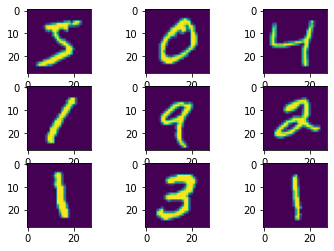

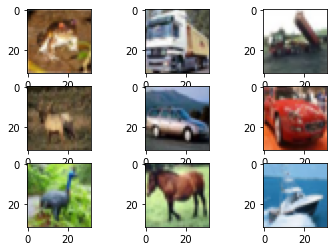

In [2]:
import matplotlib.pyplot as plt
for i in range(9):
  # define subplot
  plt.subplot(330 + 1 + i)
  # plot raw pixel data
  plt.imshow(X_train_mnist[i])
  # show the figure
plt.show()

for i in range(9):
  # define subplot
  plt.subplot(330 + 1 + i)
  # plot raw pixel data
  plt.imshow(X_train_cifar10[i])
  # show the figure
plt.show()

In [3]:
# Scale X_train and X_test data
X_train_mnist = X_train_mnist/255
X_test_mnist = X_test_mnist/255

# Make categorical labels (one-hot encode)
from keras.utils import to_categorical
Y_train_mnist = to_categorical(Y_train_mnist)
Y_test_mnist = to_categorical(Y_test_mnist)

Y_train_cifar10 = to_categorical(Y_train_cifar10)
Y_test_cifar10 = to_categorical(Y_test_cifar10)

# Reshape 28x28 image to 3D array: 28x28x1
X_train_mnist = X_train_mnist.reshape(X_train_mnist.shape + (1,))
X_test_mnist = X_test_mnist.reshape(X_test_mnist.shape + (1,))

print('Size of Train_mnist: X=%s, Y=%s' % (X_train_mnist.shape, Y_train_mnist.shape))
print('Size of Test_mnist: X=%s, Y=%s' % (X_test_mnist.shape, Y_test_mnist.shape))

print('Size of Train_cifar10: X=%s, Y=%s' % (X_train_cifar10.shape, Y_train_cifar10.shape))
print('Size of Test_cifar10: X=%s, Y=%s' % (X_test_cifar10.shape, Y_test_cifar10.shape))

Size of Train_mnist: X=(60000, 28, 28, 1), Y=(60000, 10)
Size of Test_mnist: X=(10000, 28, 28, 1), Y=(10000, 10)
Size of Train_cifar10: X=(50000, 32, 32, 3), Y=(50000, 10)
Size of Test_cifar10: X=(10000, 32, 32, 3), Y=(10000, 10)


# *2. Define CNN*

In [4]:
from matplotlib.cbook import flatten
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Flatten,Dense, Dropout

# Create model
model_mnist = Sequential()
model_cifar10 = Sequential()
model_cifar10_reg = Sequential()

# Add layers
model_mnist.add(Conv2D(32, kernel_size=3,activation='relu',input_shape=X_train_mnist.shape[1:4]))
model_mnist.add(Conv2D(32, kernel_size=3,activation='relu'))

model_mnist.add(MaxPooling2D((2,2)))
model_mnist.add(Flatten())
model_mnist.add(Dense(10,activation='softmax'))

In [ ]:
# CIFAR-10 without regularization
model_cifar10.add(Conv2D(32, kernel_size=3,activation='relu',padding='same',input_shape=X_train_cifar10.shape[1:4]))
model_cifar10.add(Conv2D(32, kernel_size=3,activation='relu',padding='same'))

model_cifar10.add(MaxPooling2D((2,2)))

model_cifar10.add(Conv2D(32, kernel_size=3,activation='relu',padding='same'))
model_cifar10.add(Conv2D(32, kernel_size=3,activation='relu',padding='same'))

model_cifar10.add(MaxPooling2D((2,2)))

model_cifar10.add(Conv2D(32, kernel_size=3,activation='relu',padding='same'))
model_cifar10.add(Conv2D(32, kernel_size=3,activation='relu',padding='same'))

model_cifar10.add(MaxPooling2D((2,2)))

model_cifar10.add(Flatten())
model_cifar10.add(Dense(10,activation='softmax'))

In [5]:
# CIFAR-10 with regularization
model_cifar10_reg.add(Conv2D(32, kernel_size=3,activation='relu',padding='same',input_shape=X_train_cifar10.shape[1:4]))
model_cifar10_reg.add(Conv2D(32, kernel_size=3,activation='relu',padding='same'))

model_cifar10_reg.add(MaxPooling2D(2,2))
model_cifar10_reg.add(Dropout(0.2))

model_cifar10_reg.add(Conv2D(32, kernel_size=3,activation='relu',padding='same'))
model_cifar10_reg.add(Conv2D(32, kernel_size=3,activation='relu',padding='same'))

model_cifar10_reg.add(MaxPooling2D(2,2))
model_cifar10_reg.add(Dropout(0.2))

model_cifar10_reg.add(Conv2D(32, kernel_size=3,activation='relu',padding='same'))
model_cifar10_reg.add(Conv2D(32, kernel_size=3,activation='relu',padding='same'))

model_cifar10_reg.add(MaxPooling2D(2,2))
model_cifar10_reg.add(Dropout(0.2))

model_cifar10_reg.add(Flatten())
model_cifar10_reg.add(Dense(10,activation='softmax'))

# 2. Optimizer parameters

In [10]:
# Set up optimizer
from keras.optimizers import SGD
opt = SGD(lr=0.001,momentum=0.9)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
# Compile model
model_mnist.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])


# Train a model
history_mnist = model_mnist.fit(X_train_mnist, Y_train_mnist, epochs=10, batch_size=64, validation_data=(X_test_mnist,Y_test_mnist))

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
938/938 [==============================] - 12s 5ms/step - loss: 0.7195 - accuracy: 0.8064 - val_loss: 0.3031 - val_accuracy: 0.9122
Epoch 2/10
938/938 [==============================] - 4s 5ms/step - loss: 0.2947 - accuracy: 0.9147 - val_loss: 0.2542 - val_accuracy: 0.9264
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2325 - accuracy: 0.9330 - val_loss: 0.1898 - val_accuracy: 0.9473
Epoch 4/10
938/938 [==============================] - 4s 5ms/step - loss: 0.1758 - accuracy: 0.9507 - val_loss: 0.1499 - val_accuracy: 0.9565
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.1379 - accuracy: 0.9611 - val_loss: 0.1194 - val_accuracy: 0.9658
Epoch 6/10
938/938 [==============================] - 4s 5ms/step - loss: 0.1135 - accuracy: 0.9682 - val_loss: 0.1001 - val_accuracy: 0.9720
Epoch 7/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0986 - accuracy: 0.9720 - val_loss: 0.0851 - val_accuracy: 0.9752
Epoch

In [ ]:
model_cifar10.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

history_cifar10 = model_cifar10.fit(X_train_cifar10, Y_train_cifar10, epochs=60, batch_size=64, validation_data=(X_test_cifar10,Y_test_cifar10))

Epoch 1/60
782/782 [==============================] - 8s 9ms/step - loss: 2.0846 - accuracy: 0.2506 - val_loss: 1.7022 - val_accuracy: 0.3724
Epoch 2/60
782/782 [==============================] - 5s 6ms/step - loss: 1.5531 - accuracy: 0.4403 - val_loss: 1.5128 - val_accuracy: 0.4664
Epoch 3/60
782/782 [==============================] - 5s 6ms/step - loss: 1.3575 - accuracy: 0.5173 - val_loss: 1.2893 - val_accuracy: 0.5415
Epoch 4/60
782/782 [==============================] - 5s 6ms/step - loss: 1.2421 - accuracy: 0.5616 - val_loss: 1.2208 - val_accuracy: 0.5722
Epoch 5/60
782/782 [==============================] - 5s 6ms/step - loss: 1.1636 - accuracy: 0.5897 - val_loss: 1.1403 - val_accuracy: 0.5947
Epoch 6/60
782/782 [==============================] - 5s 6ms/step - loss: 1.0895 - accuracy: 0.6146 - val_loss: 1.1565 - val_accuracy: 0.5895
Epoch 7/60
782/782 [==============================] - 5s 7ms/step - loss: 1.0291 - accuracy: 0.6372 - val_loss: 1.1286 - val_accuracy: 0.6023
Epoch 

In [11]:
model_cifar10_reg.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

history_cifar10_reg = model_cifar10_reg.fit(X_train_cifar10, Y_train_cifar10, epochs=60, batch_size=64, validation_data=(X_test_cifar10,Y_test_cifar10))

Epoch 1/60
782/782 [==============================] - 15s 7ms/step - loss: 2.1267 - accuracy: 0.2203 - val_loss: 1.7801 - val_accuracy: 0.3425
Epoch 2/60
782/782 [==============================] - 5s 7ms/step - loss: 1.7457 - accuracy: 0.3504 - val_loss: 1.6797 - val_accuracy: 0.3984
Epoch 3/60
782/782 [==============================] - 5s 7ms/step - loss: 1.6216 - accuracy: 0.4007 - val_loss: 1.5348 - val_accuracy: 0.4451
Epoch 4/60
782/782 [==============================] - 5s 7ms/step - loss: 1.5302 - accuracy: 0.4391 - val_loss: 1.4906 - val_accuracy: 0.4666
Epoch 5/60
782/782 [==============================] - 5s 7ms/step - loss: 1.4449 - accuracy: 0.4733 - val_loss: 1.3346 - val_accuracy: 0.5265
Epoch 6/60
782/782 [==============================] - 5s 7ms/step - loss: 1.3763 - accuracy: 0.5067 - val_loss: 1.2831 - val_accuracy: 0.5416
Epoch 7/60
782/782 [==============================] - 5s 7ms/step - loss: 1.3235 - accuracy: 0.5272 - val_loss: 1.1949 - val_accuracy: 0.5888
Epoch

# *3. Visualize results*


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 10)                46090     
                                                                 
Total params: 55,658
Trainable params: 55,658
Non-trainable params: 0
____________________________________________________

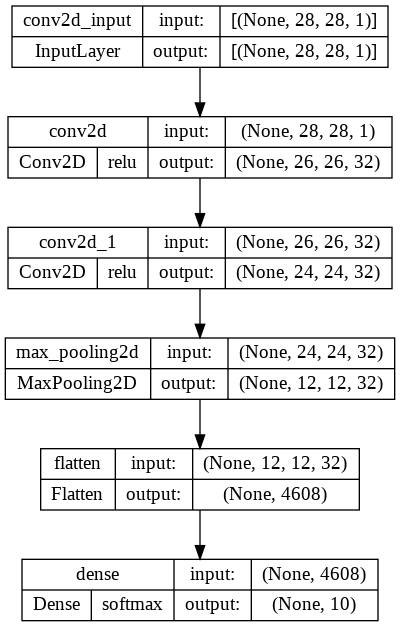

In [ ]:
# Visualize in console (text)
print(model_mnist.summary())

# Visualize graphically
from keras.utils.vis_utils import plot_model
plot_model(model_mnist, to_file='model.png', show_shapes=True, show_layer_names=True, show_layer_activations=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                  

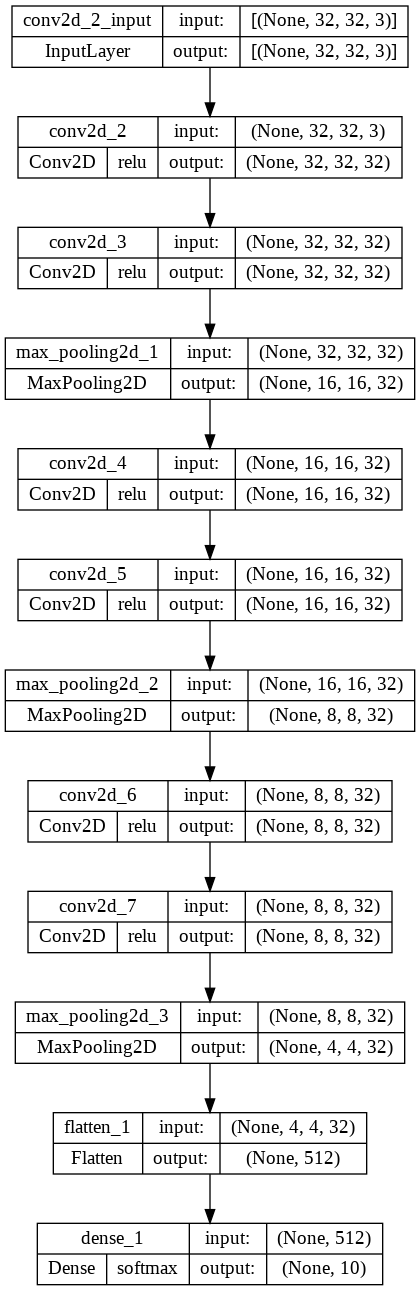

In [ ]:
print(model_cifar10.summary())

# Visualize graphically
from keras.utils.vis_utils import plot_model
plot_model(model_cifar10, to_file='model.png', show_shapes=True, show_layer_names=True, show_layer_activations=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 32)        9248      
                                                      

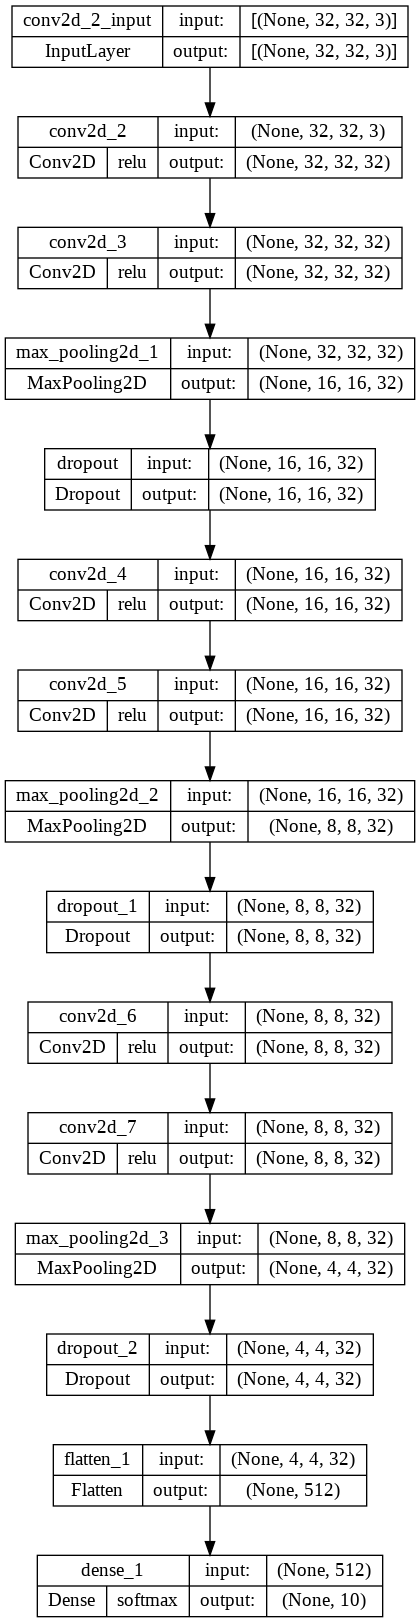

In [12]:
print(model_cifar10_reg.summary())

# Visualize graphically
from keras.utils.vis_utils import plot_model
plot_model(model_cifar10_reg, to_file='model.png', show_shapes=True, show_layer_names=True, show_layer_activations=True)

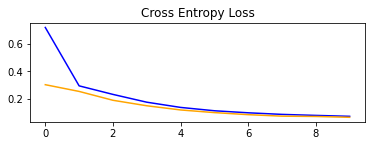

In [ ]:
plt.figure(2)
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history_mnist.history['loss'], color='blue', label='train')
plt.plot(history_mnist.history['val_loss'], color='orange', label='test')

plt.show()

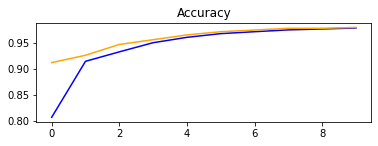

In [ ]:
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history_mnist.history['accuracy'], color='blue', label='train')
plt.plot(history_mnist.history['val_accuracy'], color='orange', label='test')
plt.show()

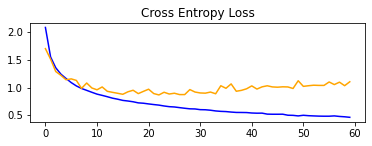

In [ ]:
plt.figure(2)
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history_cifar10.history['loss'], color='blue', label='train')
plt.plot(history_cifar10.history['val_loss'], color='orange', label='test')

plt.show()

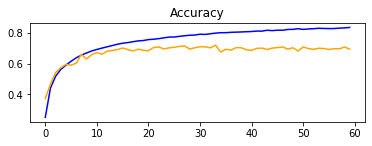

In [ ]:
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history_cifar10.history['accuracy'], color='blue', label='train')
plt.plot(history_cifar10.history['val_accuracy'], color='orange', label='test')
plt.show()

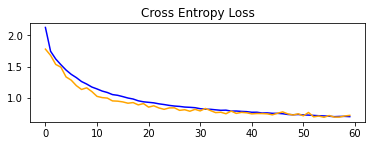

In [13]:
plt.figure(2)
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history_cifar10_reg.history['loss'], color='blue', label='train')
plt.plot(history_cifar10_reg.history['val_loss'], color='orange', label='test')

plt.show()

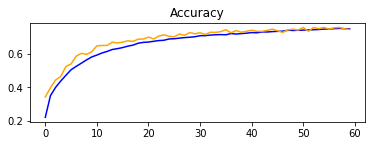

In [14]:
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history_cifar10_reg.history['accuracy'], color='blue', label='train')
plt.plot(history_cifar10_reg.history['val_accuracy'], color='orange', label='test')
plt.show()

# *4. Confusion matrix plotting*

In [15]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if not title:
    if normalize:
      title = 'Normalized confusion matrix'
    else:
      title = 'Confusion matrix, without normalization'

  # Compute confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  # Only use the labels that appear in the data
  classes = classes[unique_labels(y_true, y_pred)]

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  # print(cm)

  fig, ax = plt.subplots()
  im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
  ax.figure.colorbar(im, ax=ax)
  # We want to show all ticks...
  ax.set(xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        # ... and label them with the respective list entries
        xticklabels=classes, yticklabels=classes,
        title=title,
        ylabel='True label',
        xlabel='Predicted label')

  # Rotate the tick labels and set their alignment.
  plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
          rotation_mode="anchor")

  # Loop over data dimensions and create text annotations.
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      ax.text(j, i, format(cm[i, j], fmt),
              ha="center", va="center",
              color="white" if cm[i, j] > thresh else "black")
  fig.tight_layout()
  return ax

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization


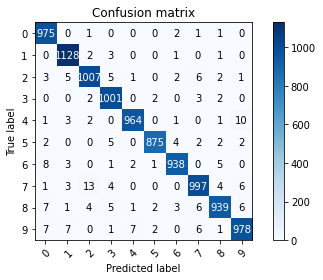

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

Y_pred_mnist = np.argmax(model_mnist.predict(X_test_mnist),axis=-1)
Y_test_mnist = np.argmax(Y_test_mnist,axis=-1)

class_names = np.array(['0','1','2','3','4','5','6','7','8','9'])
plot_confusion_matrix(Y_test_mnist, Y_pred_mnist, classes=class_names, title='Confusion matrix')

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization


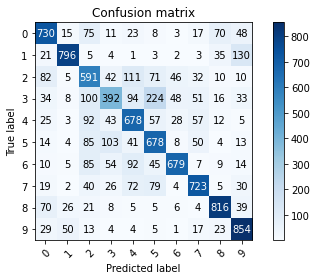

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

Y_pred_cifar10 = np.argmax(model_cifar10.predict(X_test_cifar10),axis=-1)
Y_test_cifar10 = np.argmax(Y_test_cifar10,axis=-1)

class_names = np.array(['0','1','2','3','4','5','6','7','8','9'])
plot_confusion_matrix(Y_test_cifar10, Y_pred_cifar10, classes=class_names, title='Confusion matrix')

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization


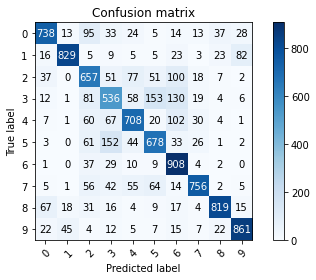

In [16]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

Y_pred_cifar10_reg = np.argmax(model_cifar10_reg.predict(X_test_cifar10),axis=-1)
Y_test_cifar10_reg = np.argmax(Y_test_cifar10,axis=-1)


class_names = np.array(['0','1','2','3','4','5','6','7','8','9'])
plot_confusion_matrix(Y_test_cifar10_reg, Y_pred_cifar10_reg, classes=class_names, title='Confusion matrix')

**END PRATICAL WORK**